# Data Analysis for Nursing Home Palliative AI Uses

## Necessary Set-Up

In [1]:
import os
import pandas as pd
import collections
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pycountry_convert as pc
import string
import re
from collections import Counter

In [2]:
# define variables for file names and paths
PARSIFAL = "data_extraction.xls"
WORKING_DIRECTORY = os.getcwd() + '/'

if not os.path.isdir("graphs"):
    os.mkdir("graphs")

In [3]:
# import parsifal data
parsifal_df = pd.read_excel(WORKING_DIRECTORY + PARSIFAL)
# extract just robotics and smart devices from parsifal data
parsifal_df = parsifal_df[~parsifal_df['Application Area'].str.contains("Expert Systems")]
# reindex the dataframe
parsifal_df = parsifal_df.reset_index(drop=True)

## A - Publication Year Analysis

### A - Findings
- COVID-19 sparked interest in robots and smart devices. 
- Interest peaked in 2021 and has been steadily declining.
- Both expert systems and robots now exist side by side in the literature. 

In [4]:
publication_years = parsifal_df["Year"].to_list()
year_frequency = collections.Counter(publication_years)
year_frequency = sorted(year_frequency.items())
year_frequency = dict(year_frequency)
year_frequency

{2021: 5, 2022: 2, 2023: 1, 2024: 1}

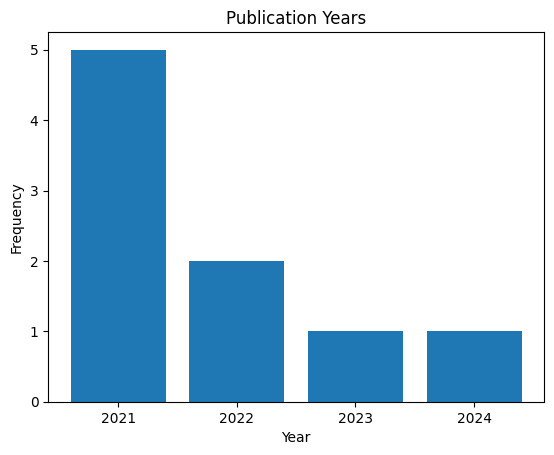

In [5]:
ax = plt.figure().gca()
ax.bar(year_frequency.keys(), year_frequency.values())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0)
plt.title("Publication Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.savefig("./graphs/publicationYears.png", bbox_inches='tight')
plt.show();

## B - Research Location Analysis

### B - Findings
- Mainly European focus. 
- Top countries are UK and Germany.

In [6]:
# country analysis
temp_countries = parsifal_df["Country"]
countries = []
for i in range(len(temp_countries)):
    temp = temp_countries[i].split(' and ')
    for i in range(len(temp)):
        if temp[i] == "usa":
            countries.append("USA")
        elif temp[i] == "uk":
            countries.append("United Kingdom")
        else:
            temp[i] = temp[i].title()
            countries.append(temp[i].strip())

countries = sorted((collections.Counter(countries)).items())
# country_names = countries.keys()
# country_freq = list(countries.values())
ones = [item for item, count in countries if count == 1]
twos = [item for item, count in countries if count == 2]
threes = [item for item, count in countries if count == 3]

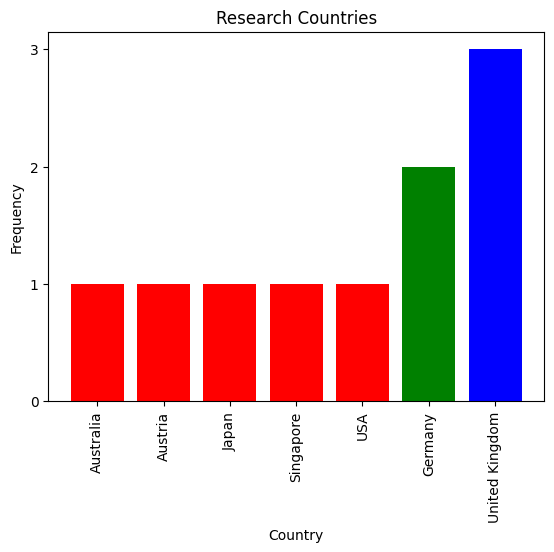

In [7]:
ax = plt.figure().gca()
ax.bar(ones, np.full(len(ones), 1), color = 'red')
ax.bar(twos, np.full(len(twos), 2), color = 'green')
ax.bar(threes, np.full(len(threes), 3), color = 'blue')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.ylim(0)
plt.title("Research Countries")
plt.ylabel("Frequency")
plt.xlabel("Country")
plt.savefig("./graphs/researchCountries.png", bbox_inches='tight')
plt.show();

In [8]:
# continent analysis
def country_to_continent(country):
    temp_alpha2 = pc.country_name_to_country_alpha2(country)
    temp_continent_code = pc.country_alpha2_to_continent_code(temp_alpha2)
    continent = pc.convert_continent_code_to_continent_name(temp_continent_code)
    return continent

In [9]:
continents = {}
for country in countries:
    try:
        continents[country_to_continent(country[0])] += country[1]
    except:
        continents[country_to_continent(country[0])] = country[1]

continents


/Users/isabel/anaconda3/envs/litreview/lib/python3.12/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/Users/isabel/anaconda3/envs/litreview/lib/python3.12/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


{'Oceania': 1, 'Europe': 6, 'Asia': 2, 'North America': 1}

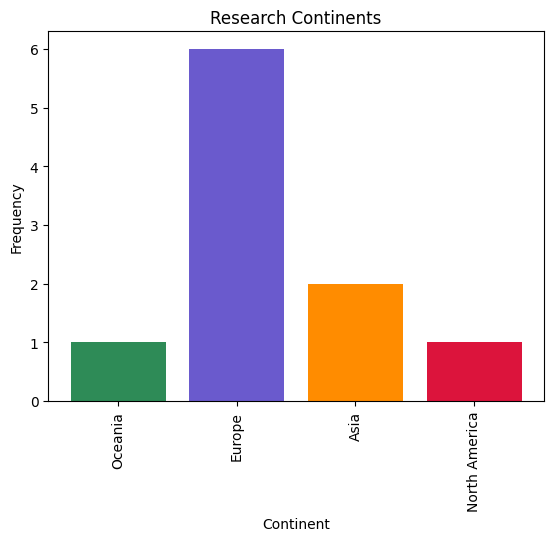

In [10]:
ax = plt.figure().gca()
ax.bar(continents.keys(), continents.values(), color = ['seagreen', 'slateblue', 'darkorange' ,'crimson'])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.ylim(0)
plt.title("Research Continents")
plt.ylabel("Frequency")
plt.xlabel("Continent")
plt.savefig("./graphs/researchContinents.png", bbox_inches='tight')
plt.show();

## C - Type of Publication

### C - Findings
- Mainly original research.

{'Case Study': 1, 'Original Research': 8}


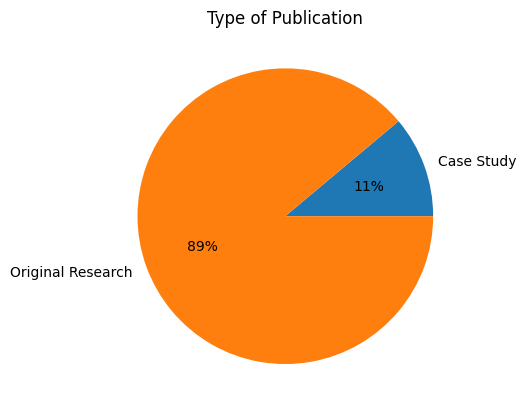

In [11]:
publication_type = dict(Counter(parsifal_df['Type of Publication']))
publication_type['Original Research'] = publication_type['Original Research (Introduction, Methods, Results, Discussion)']
del publication_type['Original Research (Introduction, Methods, Results, Discussion)']
print(publication_type)
plt.pie(publication_type.values(), labels=publication_type.keys(), autopct='%1.0f%%')
# plt.bar(publication_type.keys(), publication_type.values(), 
plt.title("Type of Publication")
plt.savefig("./graphs/typeOfPublicationPieChart.png", bbox_inches='tight')
plt.show();

## D - Types of Hardware

### D - Findings
- Robots were involved in most interventions. 
- Smart speakers also received notable mention.

In [12]:
def remove_and(pandas_series, normal_run = True):
    temp_list = []
    if normal_run:
        for item in pandas_series:
            temp_item = re.split('and |, |\n', item)
            for temp in temp_item:
                temp = temp.strip()
                if "sensor" in temp:
                    temp_list.append("Sensor")
                elif "SPSS" in temp:
                    temp_list.append("SPSS")
                elif "CARESSES" in temp:
                    temp_list.append("CARESSES")
                elif "not applicable" in temp:
                    temp_list.append("Not Discussed")
                else:
                    temp_list.append(temp.title())
        return temp_list
    else:
        for item in pandas_series:
            temp_item = re.split(', |\n', item)
            for temp in temp_item:
                temp_list.append(temp.title())
        return temp_list

{'Socially Assistive Robots': 6, 'Smart Speaker': 2, 'Smart Textile': 1, 'Sensor': 1}


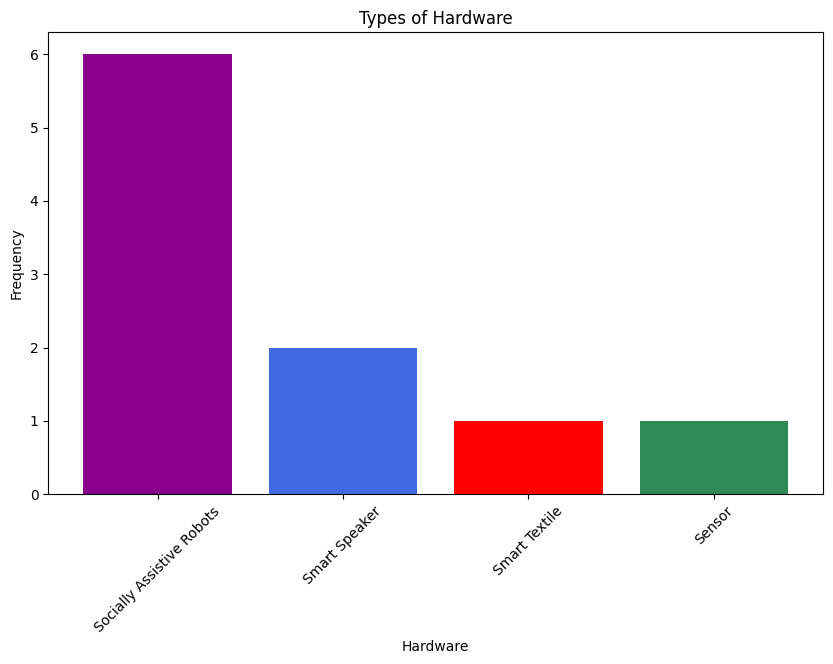

In [13]:

hardware = remove_and(parsifal_df['Hardware'])
hardware = dict(Counter(hardware))
hardware = dict(sorted(hardware.items(), key=lambda item: item[1], reverse=True))
print(hardware)
plt.figure(figsize=(10, 6))
plt.bar(hardware.keys(), hardware.values(), color=["darkmagenta",'royalblue', "red", 'seagreen', "saddlebrown", 'slateblue', 'darkorange' , "dimgrey", 'orangered' ])
plt.xlabel('Hardware')
plt.ylabel('Frequency')
plt.title('Types of Hardware')
plt.xticks(rotation=45)
plt.savefig("./graphs/hardwareBarChart.png", bbox_inches='tight')
plt.show();

## E - Types of Software

### E - Findings
- Most studies did not discuss their use of software.

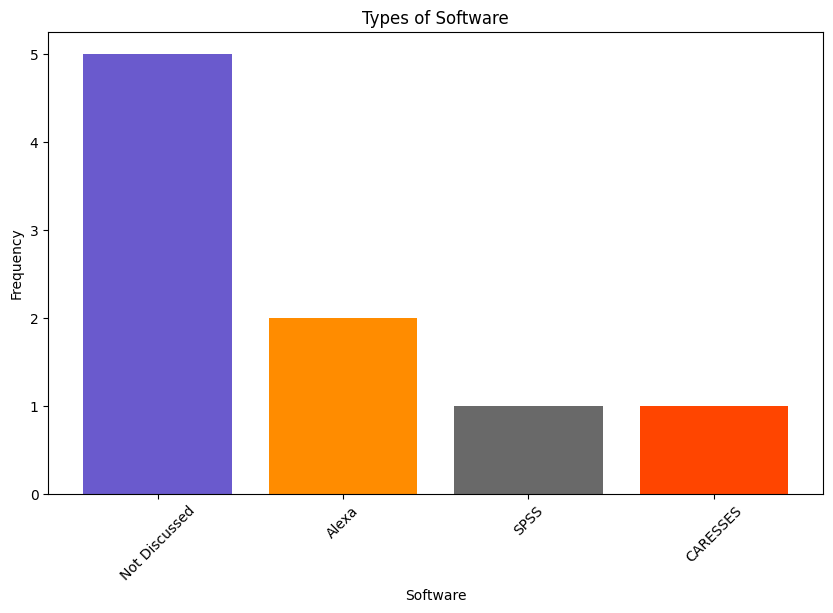

In [14]:
software = remove_and(parsifal_df['Software'])
software = dict(Counter(software))
software = dict(sorted(software.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(software.keys(), software.values(), color=['slateblue', 'darkorange' , "dimgrey", 'orangered', 'seagreen', "saddlebrown", "darkmagenta",'royalblue', "red"])
plt.xlabel('Software')
plt.ylabel('Frequency')
plt.title('Types of Software')
plt.xticks(rotation=45)
plt.savefig("./graphs/softwareBarChart.png", bbox_inches='tight')
plt.show();

## F - Outcomes

### F - Findings
- Interventions mainly focused on alleviating lonliness.
- Well-being improvements also featured.

{'Alleviating Loneliness': 7, 'Well-Being Improvement': 3, 'Improved Cognitive Skills': 2, 'Cognitive Assessment': 1, 'Increasing Independence': 1, 'Resident Perspective Tool': 1}


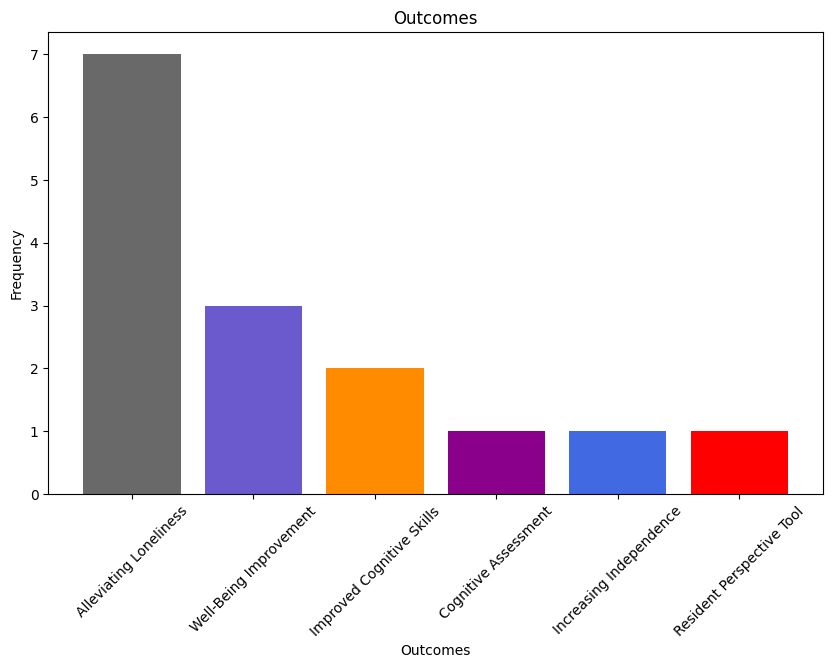

In [15]:
outcomes = dict(Counter(remove_and(parsifal_df["Outcomes"])))
outcomes = dict(sorted(outcomes.items(), key=lambda item: item[1], reverse=True))
print(outcomes)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(outcomes.keys(), outcomes.values(), color=[ "dimgrey",'slateblue', 'darkorange' , "darkmagenta",'royalblue', "red", "black", 'orangered', 'seagreen', "saddlebrown"  ])
plt.xlabel('Outcomes')
plt.ylabel('Frequency')
plt.title('Outcomes')
plt.xticks(rotation=45)
plt.savefig("./graphs/outcomesBarChart.png", bbox_inches='tight')
plt.show();

## G - AI/ML Overview

### G - Findings
- Only one study discussed the sort of ML they used. 
- They used a combination of supervised and unsupervised methods. 
- Voice and touch were the most common inputs.
- Audio-visual stimuli was the most common output. 



{'Supervised and Unsupervised': 1, 'Not Discussed': 8}


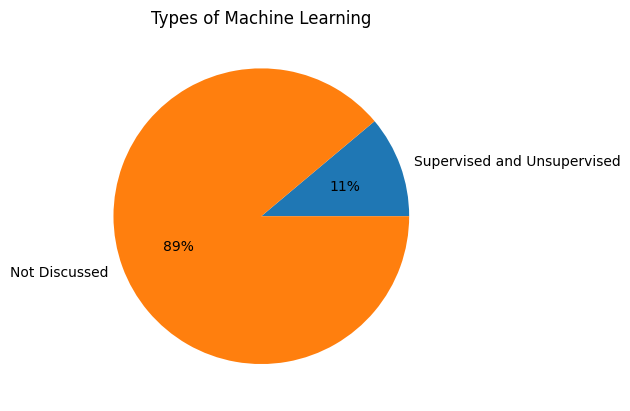

In [16]:
# supervised or unsupervised - types of ML used
ml_type = dict(Counter(parsifal_df["Type of ML Algorithm"]))
ml_type['Supervised and Unsupervised'] = ml_type['Both']
ml_type['Not Discussed'] = ml_type['Not Applicable']
del ml_type['Both']
del ml_type['Not Applicable']

print(ml_type)
plt.pie(ml_type.values(), labels=ml_type.keys(), autopct='%1.0f%%')
plt.title('Types of Machine Learning')
plt.savefig("./graphs/machineLearningTypesPieChart.png", bbox_inches='tight')
plt.show();

{'Not Discussed': 8, 'Convolutional Neural Network': 1, 'Linear Regression': 1}


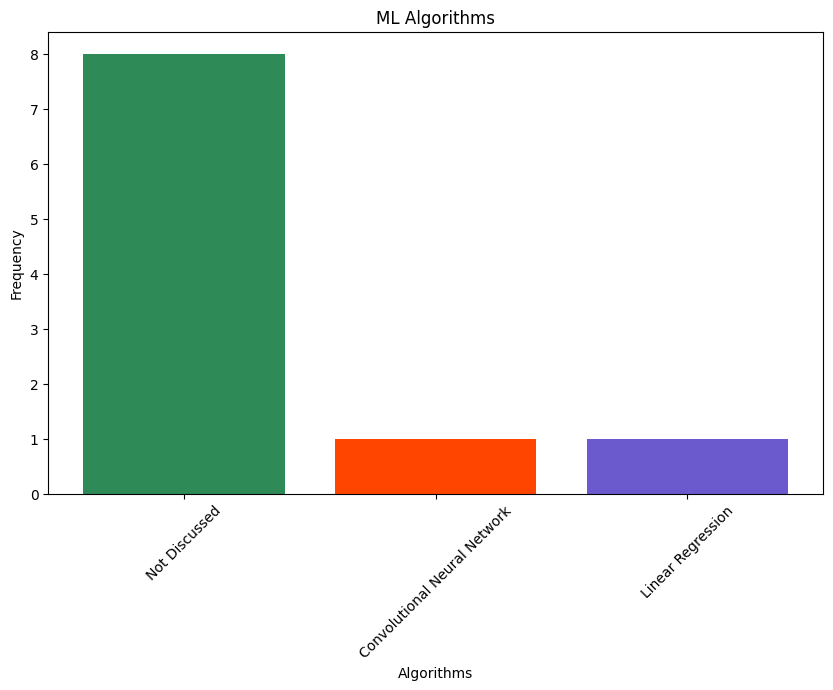

In [17]:
# types of ML algorithm used
ml_algorithms = dict(Counter(remove_and(parsifal_df["Algorithm Details"])))
ml_algorithms = dict(sorted(ml_algorithms.items(), key=lambda item: item[1], reverse=True))
print(ml_algorithms)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ml_algorithms.keys(), ml_algorithms.values(), color=['seagreen', 'orangered','slateblue', "saddlebrown",   "dimgrey", 'royalblue', "red", "black", 'darkorange' ,"darkmagenta", ])
plt.xlabel('Algorithms')
plt.ylabel('Frequency')
plt.title('ML Algorithms')
plt.xticks(rotation=45)
plt.savefig("./graphs/mlAlgorithmsBarChart.png", bbox_inches='tight')
plt.show();

{'Voice': 7, 'Touch': 6, 'Image': 2, 'Not Discussed': 1}


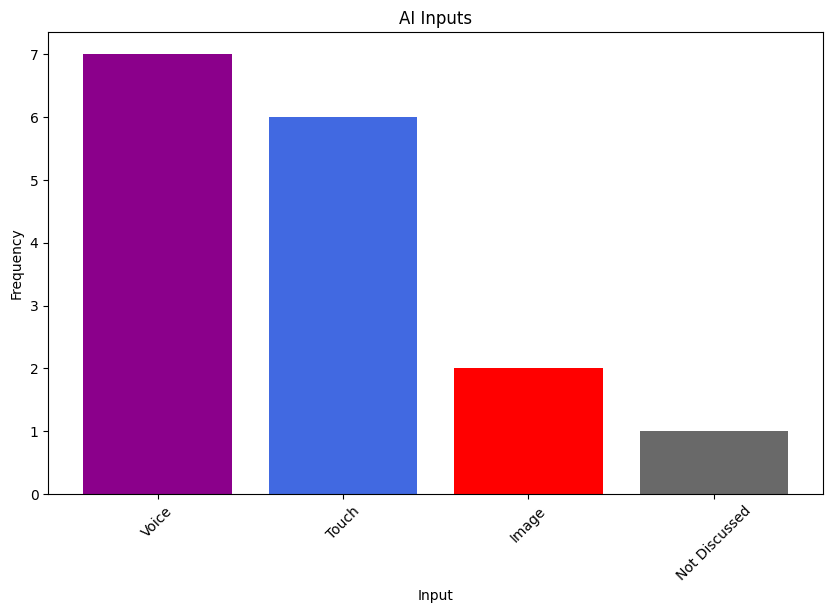

In [18]:
## AI inputs
ml_input = dict(Counter(remove_and(parsifal_df["Input"])))
ml_input = dict(sorted(ml_input.items(), key=lambda item: item[1], reverse=True))
print(ml_input)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ml_input.keys(), ml_input.values(), color=["darkmagenta",'royalblue', "red", "dimgrey",  "black", 'orangered', 'seagreen', "saddlebrown", 'slateblue',])
plt.xlabel('Input')
plt.ylabel('Frequency')
plt.title('AI Inputs')
plt.xticks(rotation=45)
plt.savefig("./graphs/AIInputBarChart.png", bbox_inches='tight')
plt.show();

{'Audio-Visual Stimuli': 8, 'Cognitive Assessment': 1, 'Not Discussed': 1}


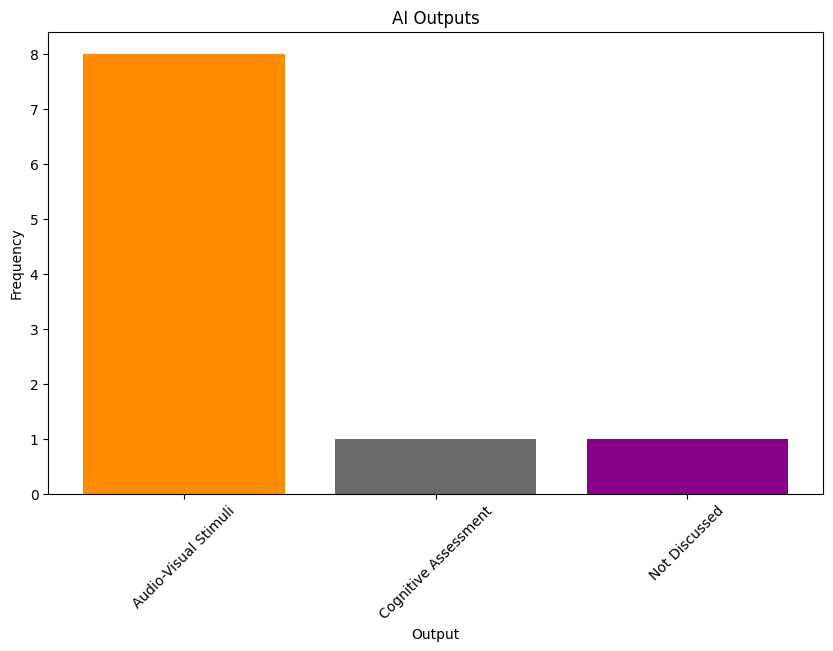

In [19]:
## ml inputs
ml_output = dict(Counter(remove_and(parsifal_df["Output"])))
ml_output = dict(sorted(ml_output.items(), key=lambda item: item[1], reverse=True))
print(ml_output)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ml_output.keys(), ml_output.values(), color=['darkorange' , "dimgrey", "darkmagenta",'royalblue', "red", "black", 'orangered', 'seagreen', "saddlebrown", 'slateblue' ])
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.title('AI Outputs')
plt.xticks(rotation=45)
plt.savefig("./graphs/AIOutputBarChart.png", bbox_inches='tight')
plt.show();

## H - End-Users

### H - End-Users
- Residents were the primary end-users.
- The majority of studies did not ask for user feedback. 
- Of the studies which involved users, the majority used some forms of user evaluation. However, many involved residents solely for data collection purposes or did not involve them at all.
- Most studies involved healthcare professionals in some capacity (such as participant selection).

{'Residents': 7, 'Residents and Healthcare Professionals': 2}


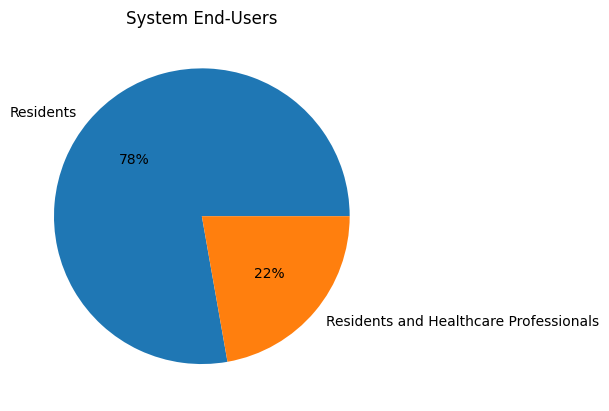

In [20]:
# types of end user
end_user_frequency = dict(Counter(remove_and(parsifal_df["End-Users"], normal_run=False)))
end_user_frequency["Residents and Healthcare Professionals"] = end_user_frequency["Residents And Healthcare Professionals"]
del end_user_frequency['Residents And Healthcare Professionals']
print(end_user_frequency)
plt.pie(end_user_frequency.values(), labels=end_user_frequency.keys(), autopct='%1.0f%%')
plt.title("System End-Users")
plt.savefig("./graphs/endUsersPieChart.png", bbox_inches='tight')
plt.show();

{'Any': 8, 'Cognitively Impaired': 1}


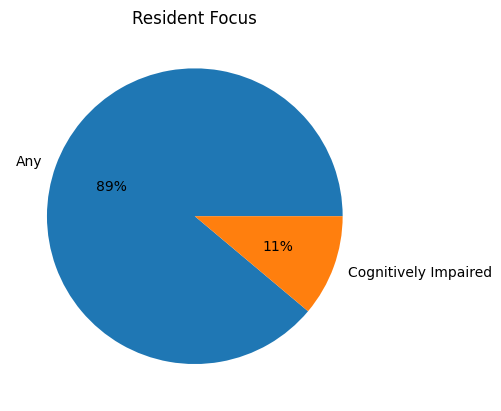

In [21]:
# types of nursing home resident
residents = dict(Counter(remove_and(parsifal_df["Type of Resident"])))
residents = dict(sorted(residents.items(), key=lambda item: item[1], reverse=True))
print(residents)
plt.pie(residents.values(), labels=residents.keys(), autopct='%1.0f%%')
plt.title('Resident Focus')
plt.savefig("./graphs/typesOfResidentPieChart.png", bbox_inches='tight')
plt.show();

In [22]:
# patient involvement
patient_involvement = dict(Counter(parsifal_df['Patient Involvement']))
print('Patient Involvement: ', patient_involvement)

# how were patients involved?
involved_patients_details = dict(Counter(parsifal_df['Patient Involvement Details']))
print('Patient Involvement Details: ', involved_patients_details)

# what patients were asked for feedback?
patient_feedback = {"Feedback" : involved_patients_details['user experience evaluation'], "No Feedback": (involved_patients_details['database'] + involved_patients_details['not applicable'])}
print('Patient Feedback: ', patient_feedback)

Patient Involvement:  {'Yes': 7, 'No': 2}
Patient Involvement Details:  {'user experience evaluation': 4, 'not applicable': 2, 'database': 3}
Patient Feedback:  {'Feedback': 4, 'No Feedback': 5}


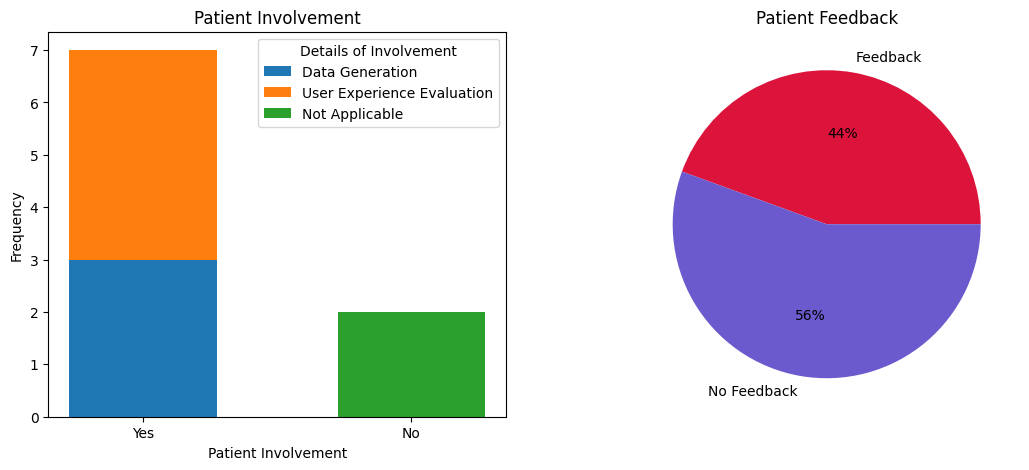

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# ---- first plot ----
labels = ['Yes', 'No']
single_value = [patient_involvement['No']]
divided_value = [involved_patients_details['database'], involved_patients_details['user experience evaluation']]

bar_width = 0.55
index = range(len(labels))

# plot divided value
rects2 = axs[0].bar(index[0], divided_value[0], bar_width, label='Data Generation')
rects3 = axs[0].bar(index[0], divided_value[1], bar_width, bottom=divided_value[0], label='User Experience Evaluation')

# plot single value
rects1 = axs[0].bar(index[1], single_value[0], bar_width, label='Not Applicable')
# create rest of details 
axs[0].set_xlabel('Patient Involvement')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Patient Involvement')
axs[0].set_xticks(index)
axs[0].set_xticklabels(labels)
axs[0].legend(title = "Details of Involvement")

# ---- second plot ----
axs[1].pie(patient_feedback.values(), labels=patient_feedback.keys(), autopct='%1.0f%%', colors=['crimson', 'slateblue'])
axs[1].set_title('Patient Feedback')

plt.savefig("./graphs/patientInvolvementBarAndPieCharts.png", bbox_inches='tight')
# show plot
plt.show();

In [24]:
# health professional involvement
health_involvement = dict(Counter(remove_and(parsifal_df['Health Professional Involvement'])))
health_involvement = dict(sorted(health_involvement.items(), key=lambda item: item[1], reverse=True))
print('Health Professional Involvement: ', health_involvement)

# how were health professionals involved?
involved_health_details = dict(Counter(remove_and(parsifal_df['Health Professional Involvement Details'])))
involved_health_details['Database Generation'] = involved_health_details['Database']
del involved_health_details['Database']
del involved_health_details['Not Discussed']
involved_health_details = dict(sorted(involved_health_details.items(), key=lambda item: item[1], reverse=False))
print('Health Professional Involvement Details: ', involved_health_details)

Health Professional Involvement:  {'Yes': 7, 'No': 2}
Health Professional Involvement Details:  {'Database Generation': 1, 'Test Environment Arrangement': 2, 'User Experience Evaluation': 2, 'Participant Selection': 6}


{'Yes': 7, 'No': 2}


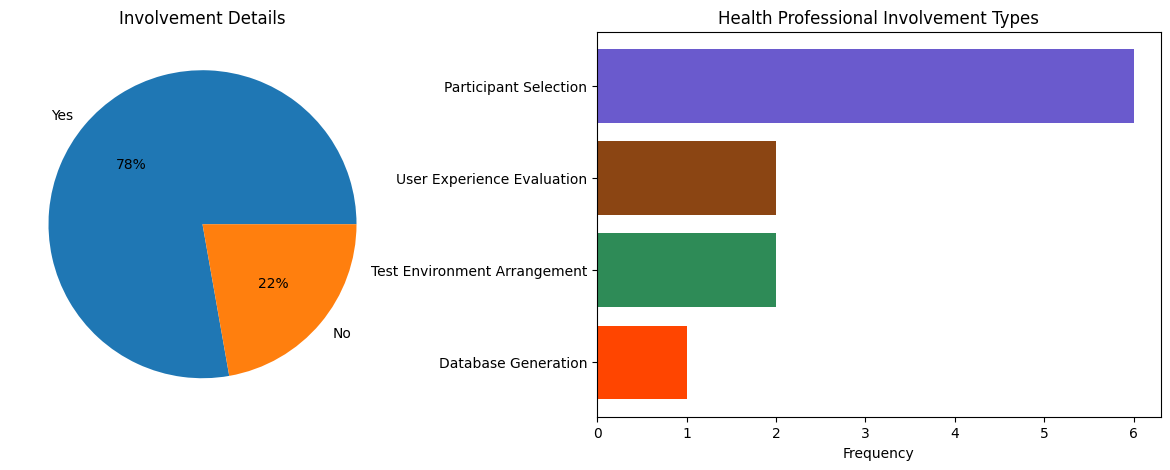

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# ---- first plot ----
print(health_involvement)
axs[0].pie(health_involvement.values(), labels=health_involvement.keys(), autopct='%1.0f%%')
axs[0].set_title('Involvement Details')



axs[1].barh(list(involved_health_details.keys()), involved_health_details.values(), color=['orangered', 'seagreen', "saddlebrown", 'slateblue', "dimgrey", "darkmagenta",  "black", 'royalblue'])
# plt.xticks(rotation = 90)
axs[1].set_xlabel('Frequency')
axs[1].set_title('Health Professional Involvement Types')
plt.savefig("./graphs/healthProfessionalInvolvementPieAndBarCharts.png", bbox_inches='tight')
plt.show();